# Data Generation

In [190]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import random
from pathlib import Path
from datetime import datetime, timedelta
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm


### Data Collection

In [179]:
data = Path("AUDUSD_historical_data.csv")
df = pd.read_csv(data)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df.iloc[::-1]
df.head()

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2022-08-04,0.69371,0.69897,0.69320,0.69595,22.4,0.32
2022-08-05,0.69597,0.69748,0.68670,0.68917,-68.0,-0.99
2022-08-08,0.69027,0.70088,0.68950,0.69884,85.7,1.23
2022-08-09,0.69884,0.69940,0.69375,0.69540,-34.4,-0.49
2022-08-10,0.69543,0.71088,0.69440,0.70817,127.4,1.80


In [180]:
fx_news_data = Path('fx_calender_jan07_feb2023.csv')
fx_news = pd.read_csv(fx_news_data)
fx_news['timestamp'] = pd.to_datetime(fx_news['timestamp'], unit = 's')
fx_news = fx_news.dropna()
fx_news.head()

,currency,timestamp,time,event_title,impact,actual,forecast,previous,actual_sentiment,revised_from,revised_sentiment
6,USD,2007-01-03 13:15:00,13:15,ADP Non-Farm Employment Change,medium,-40K,120K,230K,worse,158K,better
25,NZD,2007-01-03 21:45:00,21:45,Trade Balance,high,-785M,-976M,-1174M,better,-1167M,worse
38,EUR,2007-01-08 07:00:00,7:00,German Retail Sales m/m,medium,-0.30%,0.60%,-0.50%,worse,-0.20%,worse
42,EUR,2007-01-09 11:00:00,11:00,German Industrial Production m/m,medium,1.80%,1.00%,-0.80%,better,-1.40%,better
43,CAD,2007-01-09 13:15:00,13:15,Housing Starts,high,212K,230K,229K,worse,225K,better


In [181]:
aud_news = fx_news[fx_news['currency'] == 'AUD']
aud_news['timestamp'] = (
    pd.to_datetime(aud_news['timestamp']).dt.strftime('%d/%m/%Y')
)

In [182]:
kamay_trades = ['12/09/2013', '03/09/2013',
                '10/10/2013', '01/10/2013', '02/10/2013',
                '07/11/2013', '04/11/2013', '31/10/2013',
                '12/12/2013', '02/12/2013',
                '13/02/2014', '06/03/2014', '03/02/2014', '27/02/2014',
                '13/03/2014', '06/03/2014',
                '10/04/2014', '03/04/2014', '02/04/2014',
                '08/05/2014', '07/05/2014', '05/05/2014']

In [183]:
time_str = "11:30"
dt = datetime.strptime(time_str, "%H:%M").time()

In [184]:
filtered_all = aud_news[aud_news['timestamp'].isin(kamay_trades)]
filtered_all['time'] = dt
filtered_all['timestamp'] = pd.to_datetime(filtered_all['timestamp'], dayfirst = True)
filtered_all = filtered_all.set_index(filtered_all['timestamp'])
filtered_all = filtered_all.drop(columns = 'timestamp')
filtered_all

,currency,time,event_title,impact,actual,forecast,previous,actual_sentiment,revised_from,revised_sentiment
timestamp,,,,,,,,,,
2013-10-02,AUD,11:30:00,Building Approvals m/m,high,-4.70%,-0.70%,10.20%,worse,10.80%,worse
2013-10-31,AUD,11:30:00,Building Approvals m/m,high,14.40%,2.90%,-1.60%,better,-4.70%,better
2013-12-02,AUD,11:30:00,Building Approvals m/m,high,-1.80%,-4.30%,16.90%,better,14.40%,better
2013-11-07,AUD,11:30:00,Employment Change,high,1.1K,10.3K,3.3K,worse,9.1K,worse
2013-11-04,AUD,11:30:00,Retail Sales m/m,high,0.80%,0.50%,0.50%,better,0.40%,better
2014-03-06,AUD,11:30:00,Retail Sales m/m,high,1.20%,0.50%,0.70%,better,0.50%,better
2014-05-07,AUD,11:30:00,Retail Sales m/m,high,0.10%,0.40%,0.30%,worse,0.20%,better
2014-02-27,AUD,11:30:00,Private Capital Expenditure q/q,high,-5.20%,-1.00%,2.60%,worse,3.60%,worse
2014-03-13,AUD,11:30:00,Employment Change,high,47.3K,15.3K,18.0K,better,-3.7K,better


In [185]:
data = Path("AUD_USD Historical Data.csv")
daily_audusd = pd.read_csv(data)
daily_audusd = daily_audusd.iloc[::-1]
daily_audusd['Date'] = pd.to_datetime(daily_audusd['Date'], dayfirst=True)
daily_audusd = daily_audusd.set_index(daily_audusd['Date'])
daily_audusd = daily_audusd.drop(columns = 'Date')
daily_audusd = daily_audusd.replace('%', '', regex=True).astype(float)
daily_audusd.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2013-01-01,1.0395,1.0394,1.0446,1.0385,NaN,0.02
2013-01-02,1.0503,1.0396,1.0527,1.0375,NaN,1.04
2013-01-03,1.0464,1.0503,1.0530,1.0459,NaN,-0.37
2013-01-04,1.0478,1.0467,1.0490,1.0394,NaN,0.13
2013-01-07,1.0502,1.0471,1.0513,1.0463,NaN,0.23


In [186]:
daily_audusd['H&K Insider Trade'] = False
event_dates = filtered_all.index
daily_audusd.loc[daily_audusd.index.isin(event_dates), 'H&K Insider Trade'] = True
daily_audusd.head()

,Price,Open,High,Low,Vol.,Change %,H&K Insider Trade
Date,,,,,,,
2013-01-01,1.0395,1.0394,1.0446,1.0385,NaN,0.02,False
2013-01-02,1.0503,1.0396,1.0527,1.0375,NaN,1.04,False
2013-01-03,1.0464,1.0503,1.0530,1.0459,NaN,-0.37,False
2013-01-04,1.0478,1.0467,1.0490,1.0394,NaN,0.13,False
2013-01-07,1.0502,1.0471,1.0513,1.0463,NaN,0.23,False


### Paper Statistics

In [191]:
# Garman-Klass intraday volatility
daily_audusd['gke'] = 0.25 * (np.log(daily_audusd['High']/daily_audusd['Low'])**2) \
           - (2*np.log(2) - 1) * (np.log(daily_audusd['Price']/daily_audusd['Open'])**2)
gke_stats = daily_audusd.groupby('H&K Insider Trade')['gke'].agg(['mean', 'std', 'median'])
gke_stats

,mean,std,median
H&K Insider Trade,,,
False,0.000013,0.000015,0.000009
True,0.000015,0.000012,0.000014


In [192]:
# CUSUM
files_lst = ['EUR_USD', 'CHF_USD', 'USD_JPY', 'GBP_USD']
data_df = pd.DataFrame()
for file in files_lst:
    data = Path(f"{file} Historical Data.csv")
    df = pd.read_csv(data)
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df = df.set_index(df['Date'])
    df.rename(columns = {'Change %': f'{file}_Change %'}, inplace = True)
    data_df = pd.concat([data_df, df[f'{file}_Change %']], axis = 1)

df_numeric = data_df.replace('%', '', regex=True).astype(float)
df_numeric['global_ret'] = df_numeric.sum(axis = 1) / 4
df_numeric = df_numeric.iloc[::-1]
df_numeric.head()

,EUR_USD_Change %,CHF_USD_Change %,USD_JPY_Change %,GBP_USD_Change %,global_ret
2013-01-01 00:00:00,0.08,-0.12,-0.08,-0.05,-0.0425
2013-01-02 00:00:00,-0.15,-0.17,0.77,0.07,0.1300
2013-01-03 00:00:00,-1.05,-0.95,-0.13,-0.92,-0.7625
2013-01-04 00:00:00,0.16,0.25,1.02,-0.22,0.3025
2013-01-07 00:00:00,0.37,0.31,-0.40,0.26,0.1350


In [193]:
window = 63
daily_audusd['beta'] = (df_numeric['global_ret'].rolling(window)
              .cov(daily_audusd['Change %'])
              / df_numeric['global_ret'].rolling(window).var())

daily_audusd['excess'] = daily_audusd['Change %'] - daily_audusd['beta']*df_numeric['global_ret']
daily_audusd = daily_audusd.fillna(0)
daily_audusd.head()

,Price,Open,High,Low,Vol.,Change %,H&K Insider Trade,gke,beta,excess
Date,,,,,,,,,,
2013-01-01,1.0395,1.0394,1.0446,1.0385,0.0,0.02,False,0.000009,0.0,0.0
2013-01-02,1.0503,1.0396,1.0527,1.0375,0.0,1.04,False,0.000012,0.0,0.0
2013-01-03,1.0464,1.0503,1.0530,1.0459,0.0,-0.37,False,0.000006,0.0,0.0
2013-01-04,1.0478,1.0467,1.0490,1.0394,0.0,0.13,False,0.000021,0.0,0.0
2013-01-07,1.0502,1.0471,1.0513,1.0463,0.0,0.23,False,0.000002,0.0,0.0


In [194]:
# CUSUM
cusum_stats = daily_audusd.groupby('H&K Insider Trade')[['beta', 'excess']].agg(['mean', 'std', 'median'])
cusum_stats

beta                        excess                    
                       mean       std    median      mean       std    median
H&K Insider Trade                                                            
False              0.539100  0.345735  0.612131 -0.054591  0.537857  0.000000
True               0.550312  0.408882  0.462519  0.195334  0.426248 -0.028401

In [196]:
# News statistic
daily_audusd['news_release'] = False
aud_news['timestamp'] = pd.to_datetime(aud_news['timestamp'], dayfirst = True)
daily_audusd.loc[daily_audusd.index.isin(aud_news['timestamp']), 'news_release'] = True
daily_audusd['excess_x_news'] = daily_audusd['excess'] * daily_audusd['news_release']

In [197]:
daily_audusd.head()

,Price,Open,High,Low,Vol.,Change %,H&K Insider Trade,gke,beta,excess,news_release,excess_x_news
Date,,,,,,,,,,,,
2013-01-01,1.0395,1.0394,1.0446,1.0385,0.0,0.02,False,0.000009,0.0,0.0,False,0.0
2013-01-02,1.0503,1.0396,1.0527,1.0375,0.0,1.04,False,0.000012,0.0,0.0,False,0.0
2013-01-03,1.0464,1.0503,1.0530,1.0459,0.0,-0.37,False,0.000006,0.0,0.0,False,0.0
2013-01-04,1.0478,1.0467,1.0490,1.0394,0.0,0.13,False,0.000021,0.0,0.0,False,0.0
2013-01-07,1.0502,1.0471,1.0513,1.0463,0.0,0.23,False,0.000002,0.0,0.0,False,0.0


In [199]:
daily_audusd.loc[daily_audusd.index.isin(event_dates), 'H&K Insider Trade'] = True
daily_audusd['news_release'] = daily_audusd['news_release'].astype(int)
daily_audusd.head()

,Price,Open,High,Low,Vol.,Change %,H&K Insider Trade,gke,beta,excess,news_release,excess_x_news
Date,,,,,,,,,,,,
2013-01-01,1.0395,1.0394,1.0446,1.0385,0.0,0.02,False,0.000009,0.0,0.0,0,0.0
2013-01-02,1.0503,1.0396,1.0527,1.0375,0.0,1.04,False,0.000012,0.0,0.0,0,0.0
2013-01-03,1.0464,1.0503,1.0530,1.0459,0.0,-0.37,False,0.000006,0.0,0.0,0,0.0
2013-01-04,1.0478,1.0467,1.0490,1.0394,0.0,0.13,False,0.000021,0.0,0.0,0,0.0
2013-01-07,1.0502,1.0471,1.0513,1.0463,0.0,0.23,False,0.000002,0.0,0.0,0,0.0


In [200]:
daily_audusd['excess_x_news'] = daily_audusd['excess'] * daily_audusd['news_release'].astype(int)
daily_audusd['gke_x_news']    = daily_audusd['gke']    * daily_audusd['news_release'].astype(int)

In [201]:
### Local vs Global Information Sensitivty
window = 63            # or 252

roll_cov = daily_audusd['Change %'].rolling(window).cov(df_numeric['global_ret'])
roll_var = df_numeric['global_ret'].rolling(window).var()

daily_audusd['beta_local'] = roll_cov / roll_var
daily_audusd['low_beta_flag'] = (daily_audusd['beta_local'] < daily_audusd['beta_local'].quantile(0.3)).astype(int)


In [202]:
daily_audusd = daily_audusd.fillna(0)
daily_audusd

,Price,Open,High,Low,Vol.,Change %,H&K Insider Trade,gke,beta,excess,news_release,excess_x_news,gke_x_news,beta_local,low_beta_flag
Date,,,,,,,,,,,,,,,
2013-01-01,1.0395,1.0394,1.0446,1.0385,0.0,0.02,False,0.000009,0.000000,0.000000,0,0.0,0.0,0.000000,0
2013-01-02,1.0503,1.0396,1.0527,1.0375,0.0,1.04,False,0.000012,0.000000,0.000000,0,0.0,0.0,0.000000,0
2013-01-03,1.0464,1.0503,1.0530,1.0459,0.0,-0.37,False,0.000006,0.000000,0.000000,0,0.0,0.0,0.000000,0
2013-01-04,1.0478,1.0467,1.0490,1.0394,0.0,0.13,False,0.000021,0.000000,0.000000,0,0.0,0.0,0.000000,0
2013-01-07,1.0502,1.0471,1.0513,1.0463,0.0,0.23,False,0.000002,0.000000,0.000000,0,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-25,0.8111,0.8109,0.8132,0.8104,0.0,0.09,False,0.000003,0.796798,0.101952,0,0.0,0.0,0.796798,0
2014-12-26,0.8115,0.8117,0.8135,0.8104,0.0,0.05,False,0.000004,0.816466,0.121441,0,0.0,0.0,0.816466,0
2014-12-29,0.8130,0.8117,0.8165,0.8109,0.0,0.18,False,0.000011,0.818920,0.274176,0,0.0,0.0,0.818920,0


In [203]:
daily_audusd[daily_audusd['H&K Insider Trade'] == True].head()

,Price,Open,High,Low,Vol.,Change %,H&K Insider Trade,gke,beta,excess,news_release,excess_x_news,gke_x_news,beta_local,low_beta_flag
Date,,,,,,,,,,,,,,,
2013-10-02,0.9383,0.9397,0.9414,0.9334,0.0,-0.14,True,0.000017,0.987392,-0.194307,1,-0.194307,0.000017,0.987392,0
2013-10-31,0.9458,0.9483,0.9528,0.9450,0.0,-0.21,True,0.000014,0.970047,0.289574,1,0.289574,0.000014,0.970047,0
2013-11-04,0.9509,0.9442,0.9517,0.9428,0.0,0.76,True,0.000003,0.981413,0.595613,1,0.595613,0.000003,0.981413,0
2013-11-07,0.9453,0.9529,0.9531,0.9439,0.0,-0.70,True,-0.000001,1.066753,-0.294634,1,-0.294634,-0.000001,1.066753,0
2013-12-02,0.9100,0.9110,0.9171,0.9088,0.0,-0.11,True,0.000020,0.753609,-0.079856,1,-0.079856,0.000020,0.753609,0


In [204]:
main_stats = ['gke', 'excess', 'excess_x_news', 'gke_x_news']
main_stats_betas = ['beta', 'beta_local', 'low_beta_flag']

In [205]:
# Summary stat comparison of 4 main pillars

overall_stats_p1 = daily_audusd.groupby('H&K Insider Trade')[main_stats].agg(['mean', 'std', 'median'])
overall_stats_p1

gke                        excess                      \
                       mean       std    median      mean       std    median   
H&K Insider Trade                                                               
False              0.000013  0.000015  0.000009 -0.054591  0.537857  0.000000   
True               0.000015  0.000012  0.000014  0.195334  0.426248 -0.028401   

                  excess_x_news                     gke_x_news            \
                           mean       std    median       mean       std   
H&K Insider Trade                                                          
False                 -0.014989  0.198832 -0.000000   0.000002  0.000011   
True                   0.195334  0.426248 -0.028401   0.000015  0.000012   

                             
                     median  
H&K Insider Trade            
False              0.000000  
True               0.000014

In [206]:
overall_stats_p2 = daily_audusd.groupby('H&K Insider Trade')[main_stats_betas].agg(['mean', 'std', 'median'])
overall_stats_p2

beta                     beta_local            \
                       mean       std    median       mean       std   
H&K Insider Trade                                                      
False              0.539100  0.345735  0.612131   0.539100  0.345735   
True               0.550312  0.408882  0.462519   0.550312  0.408882   

                            low_beta_flag                   
                     median          mean       std median  
H&K Insider Trade                                           
False              0.612131      0.260274  0.439214    0.0  
True               0.462519      0.454545  0.522233    0.0

### Model Training

In [207]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
 
# --- STEP 1: Prepare and clean the training data ---

features = ['gke', 'excess', 'excess_x_news', 'gke_x_news', 'beta', 'beta_local']
X_train = daily_audusd[features].iloc[62:].copy()

# Normalize features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# --- STEP 2: Train the Isolation Forest model ---

model = IsolationForest(
    n_estimators=150,
    contamination=0.1,   
    random_state=42              
)
model.fit(X_train_scaled)

IsolationForest(contamination=0.1, n_estimators=150, random_state=42)

**Test Confusion Matrix** 

In [213]:
insider_stats = {
    'gke': {'mean': 0.000015, 'std': 0.000012},
    'excess': {'mean': 0.195334, 'std': 0.426248},
    'excess_x_news' : {'mean' : 0.195334, 'std' : 0.426248},
    'gke_x_news' : {'mean' : 0.000015, 'std' : 0.000012},
    'beta': {'mean': 0.550312, 'std': 0.408882},
    'beta_local': {'mean': 0.462519, 'std': 0.408882},
    'low_beta_flag' : {'mean': 0.454545, 'std': 0.522233}

}

normal_stats = {
    'gke': {'mean': 0.000013, 'std': 0.000015},
    'excess': {'mean': -0.054591, 'std': 0.537857},
    'excess_x_news' : {'mean' : -0.014989, 'std' : 0.198832},
    'gke_x_news' : {'mean' : 0.000002, 'std' : 0.000011},
    'beta': {'mean': 0.539100, 'std': 0.345735},
    'beta_local': {'mean': 0.539100, 'std': 0.345735},
    'low_beta_flag': {'mean': 0.260274, 'std' : 0.439214}
}


# Function to generate data from normal distribution based on mean and std
def generate_feature_data(stats, size):
    return {feature: np.random.normal(loc=params['mean'], scale=params['std'], size=size)
            for feature, params in stats.items()}


# Generate datasets
insider_df = pd.DataFrame(generate_feature_data(insider_stats, 1000))
insider_df['insider'] = True

normal_df = pd.DataFrame(generate_feature_data(normal_stats, 9000))
normal_df['insider'] = False

# Combine and shuffle
full_df = pd.concat([insider_df, normal_df], ignore_index=True)
full_df = full_df.sample(frac=1).reset_index(drop=True)

In [214]:
# 4. Prepare for model
features = ['gke', 'excess', 'excess_x_news', 'gke_x_news', 'beta', 'beta_local', 'low_beta_flag']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(full_df[features])

# 5. Train Isolation Forest
model = IsolationForest(n_estimators= 500, contamination=0.1, random_state=42)
full_df['pred'] = model.fit_predict(X_scaled)

# 6. Evaluate
confusion = pd.crosstab(full_df['insider'], full_df['pred'], rownames=['Actual'], colnames=['Predicted'])

confusion

Predicted,-1,1
Actual,,
False,703,8297
True,297,703


**Monte Carlo Simulation**

In [215]:
def generate_data(stats, size):
    return {feature: np.random.normal(loc=info['mean'], scale=info['std'], size=size)
            for feature, info in stats.items()}

In [216]:
def run_simulation_until_convergence(insider_stats, normal_stats, epsilon=0.002, min_trials=10, max_trials=500, n_samples=1000):
    features = list(insider_stats.keys())
    aggregate_conf = np.zeros((2, 2), dtype=float)
    last_avg_conf = np.zeros((2, 2), dtype=float)
    trials = 0
    print("Beginning sim")
    while trials < max_trials:
        # Generate insider and normal data
        insiders = pd.DataFrame(generate_data(insider_stats, 1000))
        insiders['insider'] = True

        normals = pd.DataFrame(generate_data(normal_stats, 9000))
        normals['insider'] = False

        # Combine and shuffle
        df = pd.concat([insiders, normals]).sample(frac=1).reset_index(drop=True)

        # Scale and fit
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(df[features])

        clf = IsolationForest(n_estimators=500, contamination=0.1, random_state=42)
        df['pred'] = clf.fit_predict(X_scaled)

        # Create confusion matrix
        cm = pd.crosstab(df['insider'], df['pred'], rownames=['Actual'], colnames=['Predicted'])
        cm = cm.reindex(index=[False, True], columns=[-1, 1], fill_value=0).values

        # Aggregate and average
        aggregate_conf += cm
        trials += 1
        avg_conf = aggregate_conf / trials

        # Convergence check (after minimum trials)
        if trials >= min_trials:
            if np.allclose(avg_conf, last_avg_conf, rtol=epsilon):
                print(f"Converged after {trials} trials")
                break
        last_avg_conf = avg_conf.copy()

        if trials % 10 == 0:
            print(f"Trial {trials}: still running...")

    return avg_conf, trials

# Run simulation
confusion_matri, trial_num = run_simulation_until_convergence(insider_stats, normal_stats)

Beginning sim
Trial 10: still running...
Converged after 12 trials


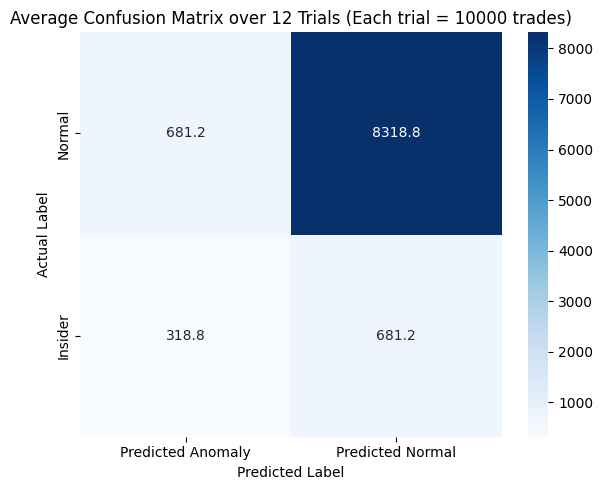

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matri, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=['Predicted Anomaly', 'Predicted Normal'],
            yticklabels=['Normal', 'Insider'])
plt.title(f"Average Confusion Matrix over {trial_num} Trials (Each trial = 10000 trades)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()